In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from filters import SimpleKalman
from utils import generate_volt_data

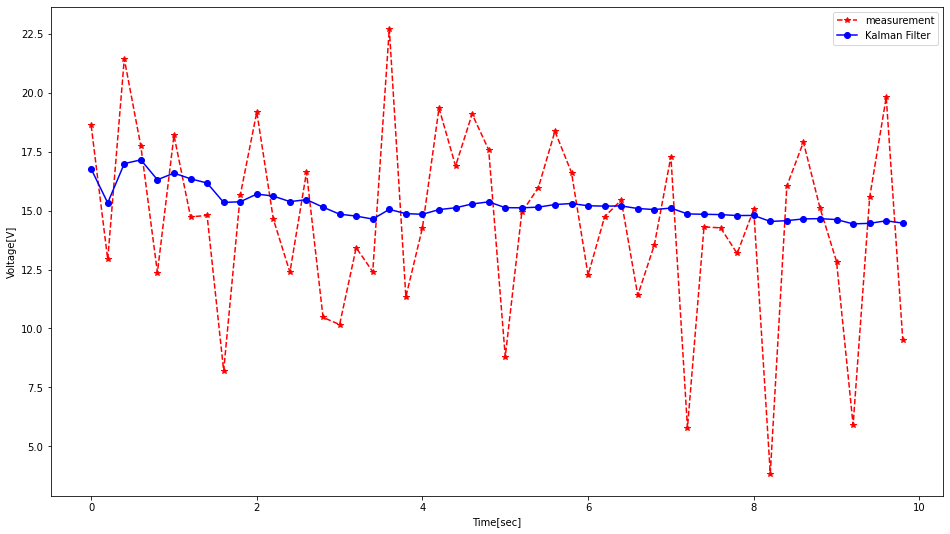

In [3]:
dt = 0.2
ts = np.arange(0, 10, dt)
sk = SimpleKalman(14, 6, 1, 1, 0, 4)
measured_volts = np.random.normal(14.4, 4, len(ts))
measured_volts = []
filtered_volts = []
Ps = []
Ks = []
for t, z in zip(ts, generate_volt_data()):
    sk.update(z)
    
    measured_volts.append(z)
    filtered_volts.append(sk.get())
    Ps.append(sk.P)
    Ks.append(sk.K)
    
fig = plt.figure(figsize=[16, 9])
plt.plot(ts, measured_volts, 'r*--', label="measurement")
plt.plot(ts, filtered_volts, 'bo-', label="Kalman Filter")
plt.legend()
plt.ylabel("Voltage[V]")
plt.xlabel("Time[sec]")
plt.show()

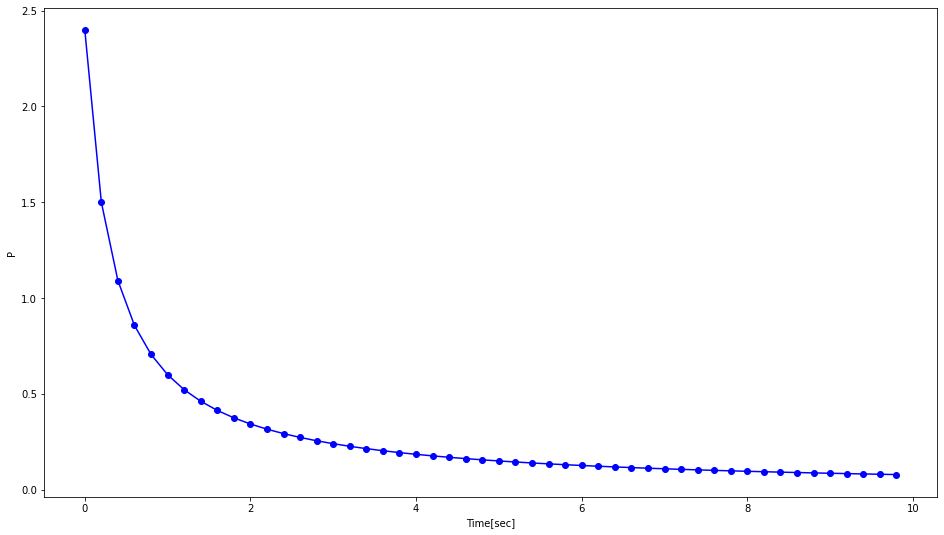

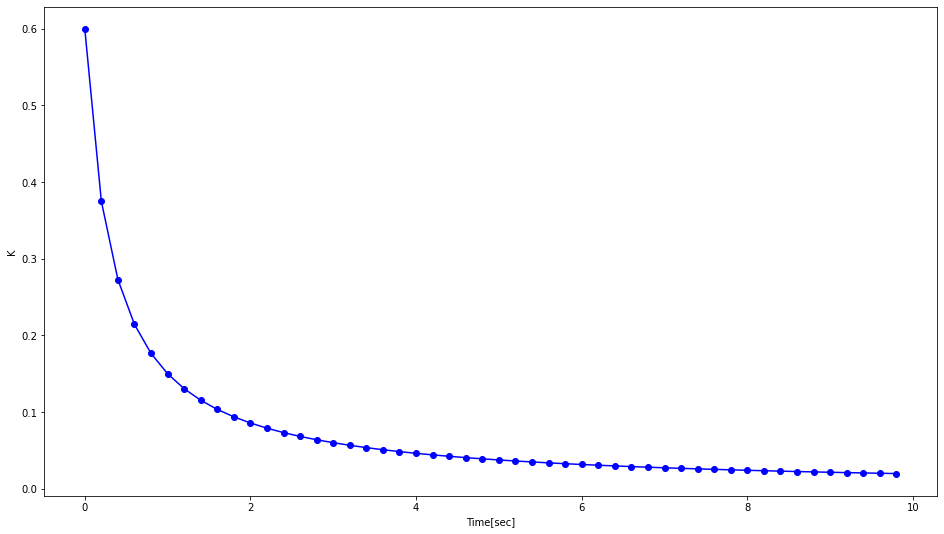

In [4]:
fig = plt.figure(figsize=[16, 9])
plt.plot(ts, Ps, 'bo-')
plt.xlabel("Time[sec]")
plt.ylabel("P")
plt.show()

fig = plt.figure(figsize=[16, 9])
plt.plot(ts, Ks, 'bo-')
plt.xlabel("Time[sec]")
plt.ylabel("K")
plt.show()